In [192]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl

## Read patient files and perform forward/backward imputation

In [86]:
# allpatients_df = pd.DataFrame(data=[])
# features = None

# for file in os.listdir('data/sepsis_data/'):
    
#     # Read file 
#     patient_df = []
#     with open('data/sepsis_data/%s' % (file)) as f:
        
#         if not features:
#             features = f.readline().rstrip('\n').split('|')
#         else:
#             # This skips the headers
#             f.readline()
        
#         for idx, line in enumerate(f):
#             # Append patient ID beginning of data vector
#             pdata = [file.split('.')[0]]
            
#             line = line.rstrip('\n')
#             pdata.extend(line.split('|'))
#             patient_df.append(pdata)
    
#     patient_df = pd.DataFrame(patient_df, columns=['pid'] + features)
    
#     # Impute missing values
#     patient_df.replace({'NaN': np.nan}, inplace=True)
#     patient_df.fillna(method='ffill', inplace=True)
#     patient_df.fillna(method='bfill', inplace=True)
    
#     # Concat to allpatients_df
#     if allpatients_df.empty:
#         allpatients_df = patient_df
#     else:
#         allpatients_df = pd.concat([allpatients_df, patient_df])
        
# allpatients_df.to_csv('data/allpatients_imputed_df')

## Read patient files and perform mean imputation

In [222]:
allpatients_df = pd.DataFrame(data=[])
features = None

count = 0
for file in os.listdir('data/sepsis_data/'):
    
    # Read file 
    patient_df = []
    with open('data/sepsis_data/%s' % (file)) as f:
        
        if not features:
            features = f.readline().rstrip('\n').split('|')
        else:
            # This skips the headers
            f.readline()
        
        for idx, line in enumerate(f):
            # Append patient ID beginning of data vector
            pdata = [file.split('.')[0]]
            
            line = line.rstrip('\n')
            pdata.extend(line.split('|'))
            patient_df.append(pdata)
    
    patient_df = pd.DataFrame(patient_df, columns=['pid'] + features)
    count += 1
    
    if count%500 == 0:
        print("count: %d"%(count))
        
    # Impute missing values
    patient_df.replace({'NaN': np.nan}, inplace=True)
    patient_df.loc[:, 'HR':'Platelets'] = patient_df.loc[:, 'HR':'Platelets'].astype(np.float64)
    patient_df.fillna(patient_df.mean()['HR':'Platelets'], inplace=True)
    
    # Concat to allpatients_df
    if allpatients_df.empty:
        allpatients_df = patient_df
    else:
        allpatients_df = pd.concat([allpatients_df, patient_df])

count: 500
count: 1000
count: 1500
count: 2000
count: 2500
count: 3000
count: 3500
count: 4000
count: 4500
count: 5000


In [225]:
allpatients_df.fillna(allpatients_df.mean()['HR':'Platelets'], inplace=True)
allpatients_df.to_csv('data/allpatients_mean_imputed')

In [196]:
allpatients_df.head()

,pid,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,p01065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,54,1,1,0,-5.76,1,0
1,p01065,83,100,NaN,103,68,58,NaN,NaN,NaN,...,NaN,NaN,NaN,54,1,1,0,-5.76,2,0
2,p01065,80,99,36.7,103,69,58,10,NaN,NaN,...,NaN,NaN,NaN,54,1,1,0,-5.76,3,0
3,p01065,87,99,NaN,107,76,67,NaN,NaN,NaN,...,NaN,NaN,NaN,54,1,1,0,-5.76,4,0
4,p01065,91,99,NaN,106,76,68,NaN,NaN,NaN,...,NaN,NaN,NaN,54,1,1,0,-5.76,5,0


In [123]:
patient_df = pd.read_csv('data/allpatients_imputed_df').drop(columns='Unnamed: 0')
# mimic_patient_df = pd.read_csv('data/sepsis3-MIMICdata/sepsis3-df.csv')

In [121]:
patient_df[patient_df.Unit1 == 1].to_csv('data/unit1_patients')
patient_df[patient_df.Unit2 == 1].to_csv('data/unit2_patients')

In [6]:
mimic_patient_df.shape

(11791, 54)

In [7]:
mimic_patient_df.columns

Index(['icustay_id', 'hadm_id', 'excluded', 'intime', 'outtime', 'dbsource',
       'suspected_infection_time_poe', 'suspected_infection_time_poe_days',
       'specimen_poe', 'positiveculture_poe', 'antibiotic_time_poe',
       'blood_culture_time', 'blood_culture_positive', 'age', 'gender',
       'is_male', 'ethnicity', 'race_white', 'race_black', 'race_hispanic',
       'race_other', 'metastatic_cancer', 'diabetes', 'height', 'weight',
       'bmi', 'first_service', 'hospital_expire_flag', 'thirtyday_expire_flag',
       'icu_los', 'hosp_los', 'sepsis_angus', 'sepsis_martin',
       'sepsis_explicit', 'septic_shock_explicit', 'severe_sepsis_explicit',
       'sepsis_nqf', 'sepsis_cdc', 'sepsis_cdc_simple', 'elixhauser_hospital',
       'vent', 'sofa', 'lods', 'sirs', 'qsofa', 'qsofa_sysbp_score',
       'qsofa_gcs_score', 'qsofa_resprate_score', 'composite_outcome',
       'blood culture', 'suspicion_poe', 'abx_poe', 'sepsis-3', 'sofa>=2'],
      dtype='object')

In [124]:
patient_df.shape

(188453, 42)

In [125]:
patient_df.columns

Index(['pid', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

## Exploratory Analysis

### 1. Figure out number of patients with sepsis 

In [13]:
patient_df[patient_df.SepsisLabel == 1]['pid'].unique().shape

(279,)

In [14]:
mimic_patient_df[mimic_patient_df['sepsis-3'] == 1]['hadm_id'].unique().shape

(5783,)

In [15]:
mimic_patient_df.hadm_id.unique().shape

(11791,)

## In MIMIC-III sepsis df, half the patients have sepsis. 

### 2. Number of Septic patients between Units

In [ ]:
patient_df[(patient_df.SepsisLabel == 1) & (patient_df.Unit1 == 1)]['pid'].unique().shape

Unit 1: 88 septic patients 

Unit 2: 191 septic patients

### Male Female Ratio

In [16]:
patient_df[(patient_df.SepsisLabel == 1) & (patient_df.Gender == 0)]['pid'].unique().shape

(122,)

122 are female and 157 are male

In [17]:
patient_df[(patient_df.Gender == 0)]['pid'].unique().shape

(2295,)

### Age Range of Septic Patients Between ICUs

In [18]:
ages = patient_df[(patient_df.SepsisLabel == 1) & (patient_df.Unit1 == 1)]['Age'].unique()

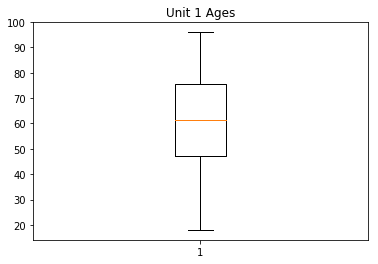

In [19]:
plt.boxplot(ages)
plt.title("Unit 1 Ages")
plt.show()

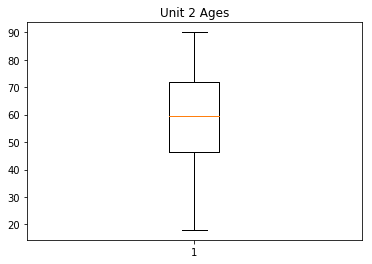

In [20]:
plt.boxplot(patient_df[(patient_df.SepsisLabel == 1) & (patient_df.Unit2 == 1)]['Age'].unique())
plt.title("Unit 2 Ages")
plt.show()


## Let's look at degree of missingness between ICUs

In [27]:
u1_patients = patient_df[patient_df.Unit1 == 1]
u2_patients = patient_df[patient_df.Unit2 == 1]

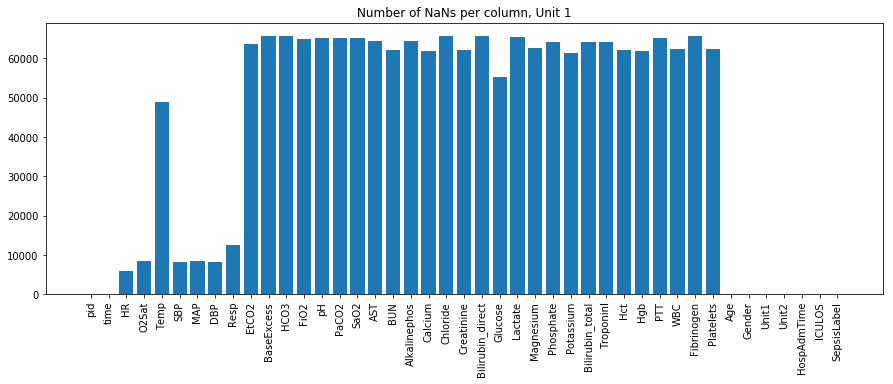

In [29]:
u1_na_count = u1_patients.isna().sum()
plt.figure(figsize=(15,5))
plt.bar(u1_na_count.index, u1_patients.isna().sum().values)
plt.title("Number of NaNs per column, Unit 1")
plt.xticks(rotation=90)
plt.figure
plt.show()

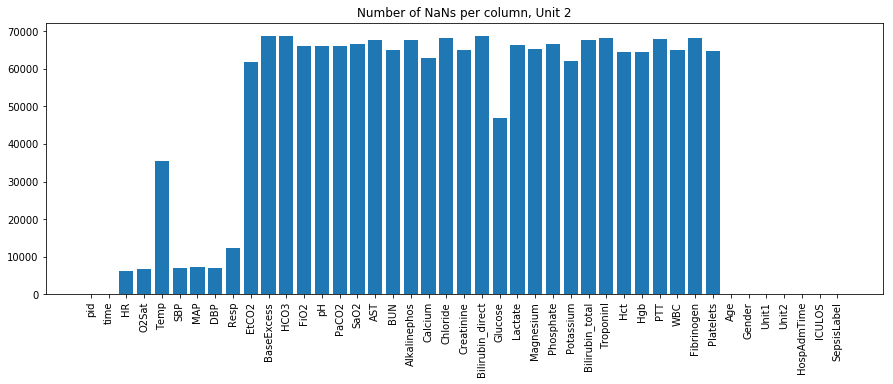

In [30]:
u2_na_count = u2_patients.isna().sum()
plt.figure(figsize=(15,5))
plt.bar(u1_na_count.index, u2_patients.isna().sum().values)
plt.title("Number of NaNs per column, Unit 2")
plt.xticks(rotation=90)
plt.show()

### Missingness in Unit 1 is a little more than Unit 2 in 2 specific columns

### What is the distribution of time steps across septic patients and non-septic patients

In [185]:
pos_time_agg = patient_df.groupby('pid').filter(lambda x: x['SepsisLabel'].any())
neg_time_agg = patient_df.groupby('pid').filter(lambda x: x['SepsisLabel'].sum() == 0)

In [177]:
time_agg.groupby('pid').ICULOS.agg(['count'])['count'].min(), time_agg.groupby('pid').ICULOS.agg(['count'])['count'].max()

(8, 336)

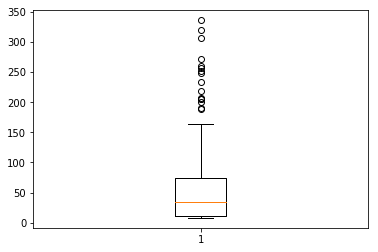

In [179]:
plt.boxplot(time_agg.groupby('pid').ICULOS.agg(['count'])['count'])
plt.show()

In [182]:
time_agg = 
time_agg['count'].min(), time_agg['count'].max()

(15524, 15524)

In [183]:
(time_agg['count'] > 30).sum()

1

{'boxes': [<matplotlib.lines.Line2D at 0x16526a6a0>],
 'caps': [<matplotlib.lines.Line2D at 0x16526ae80>,
 'fliers': [<matplotlib.lines.Line2D at 0x165f1c898>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x165f1c550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x16526a7f0>,
  <matplotlib.lines.Line2D at 0x16526ab38>]}

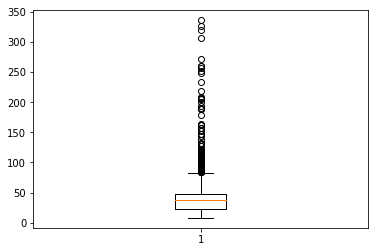

In [154]:
plt.boxplot(time_agg['count'])